In [12]:
import sys
sys.path.append('../classes/')
sys.path.append('../utils/')

import numpy as np
from scipy.io import mmread
import matplotlib.pyplot as plt
import networkx as nx
import JAXGraph
import numba


plt.style.use('dark_background')


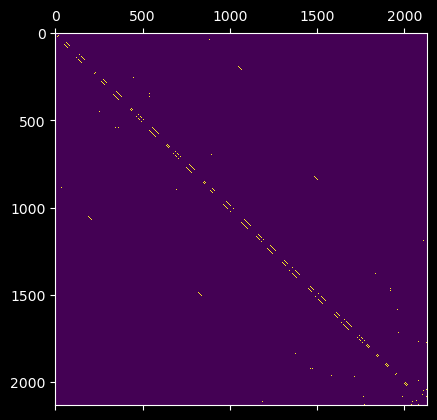

In [13]:
blackhole = mmread('../utils/blckhole.mtx')
blackhole.setdiag(0)

plt.matshow(blackhole.todense())

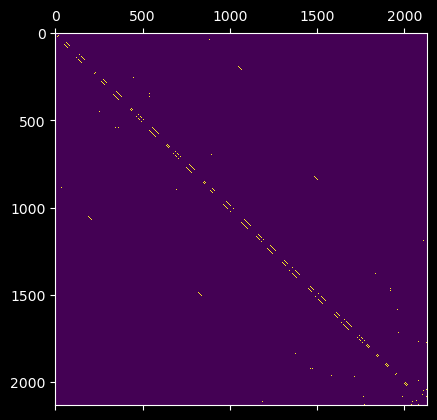

In [3]:
psi0 = np.zeros(blackhole.shape[0])
psi0[0] = 1
bh = JAXGraph.JAXAndersonGraph(nx.from_scipy_sparse_array(blackhole), psi0, [0,0], 1)
plt.matshow(nx.to_numpy_array(bh.graph))

In [14]:
layout = nx.fruchterman_reingold_layout(bh.graph)

In [15]:
history = bh.simulate(100, 100)
print(len(history))

100


MovieWriter PillowWriter unavailable; using Pillow instead.


IndexError: list index out of range

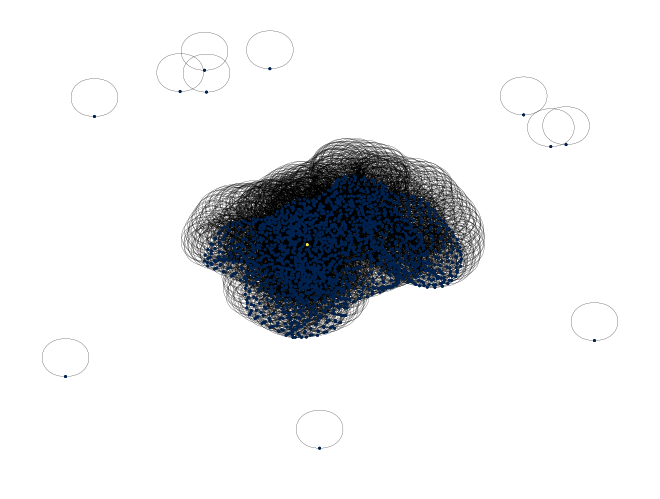

In [8]:
from matplotlib.animation import FuncAnimation
from jax import numpy as jnp
def update(frame):
    density = jnp.real(np.multiply(history[frame].conj(), history[frame]))
    nx.draw(bh.graph, layout, node_size=1, width=0.06, cmap=plt.cm.cividis, node_color=density)

ani = FuncAnimation(plt.gcf(), update, frames=range(0, 100), interval=20, repeat=True)
ani.save('blackhole.gif', writer='PillowWriter')